In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.tree import DecisionTreeRegressor as DTRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor as RFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import sklearn.metrics as sm

import matplotlib.pyplot as plt

import pickle

In [2]:
df = pd.read_csv("heart_risk.csv")

In [3]:
#дивимось на дані, їх структуру
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [4]:
df.shape
#1000 записів, 8 features, Risk - label

(1000, 10)

In [5]:
df.columns

Index(['isMale', 'isBlack', 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age',
       'Systolic', 'Cholesterol', 'HDL', 'Risk'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.3 KB


In [7]:
#кількість пропущених значень в даних
df.isnull().sum()    #немає

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

In [8]:
#статистика по колонкам
df.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.49000,0.530000,0.516000,0.522000,0.495000,59.107000,144.249000,164.043000,59.603000,19.667000
std,0.50015,0.499349,0.499994,0.499766,0.500225,11.536492,31.774528,20.329891,23.863505,17.043941
min,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,90.000000,130.000000,20.000000,0.100000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,117.000000,146.000000,39.000000,6.300000
50%,0.00000,1.000000,1.000000,1.000000,0.000000,59.000000,144.000000,164.000000,59.000000,14.400000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,69.000000,171.000000,182.000000,81.000000,29.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,79.000000,200.000000,200.000000,100.000000,85.400000


In [9]:
#кількість унікальних значень по колонках
df.nunique()

isMale              2
isBlack             2
isSmoker            2
isDiabetic          2
isHypertensive      2
Age                40
Systolic          111
Cholesterol        71
HDL                81
Risk              439
dtype: int64

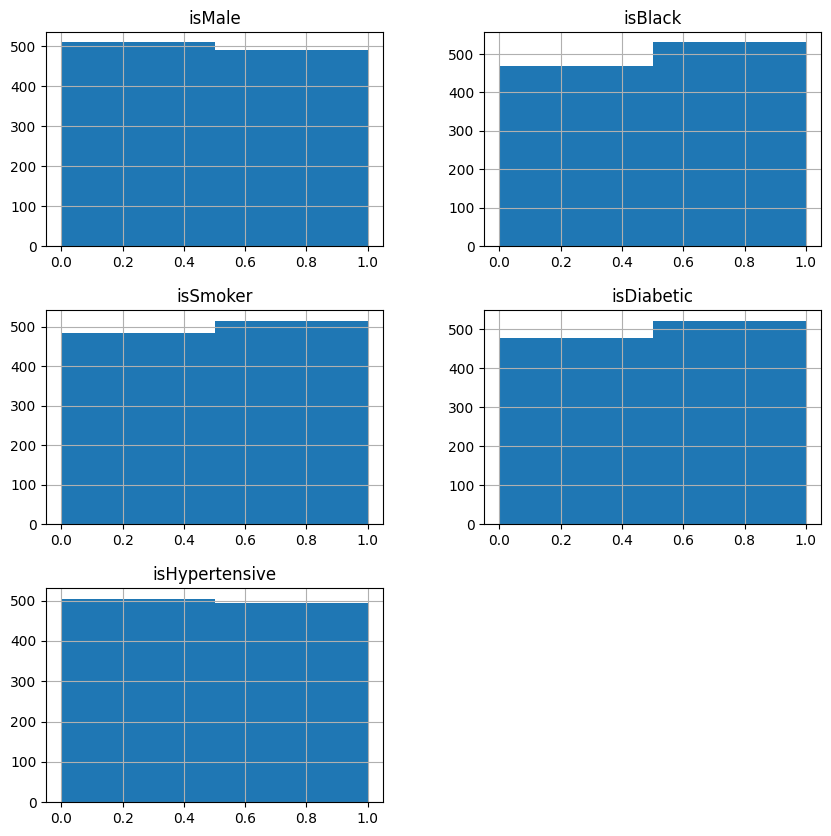

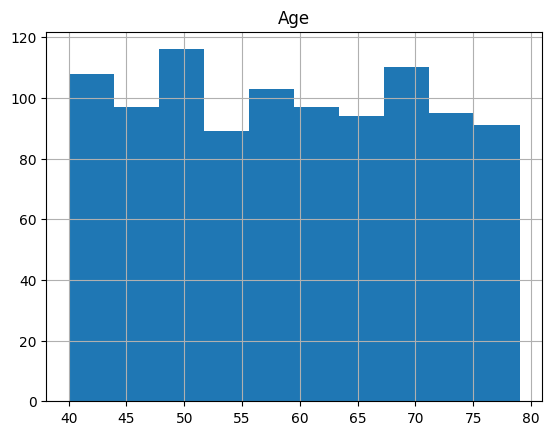

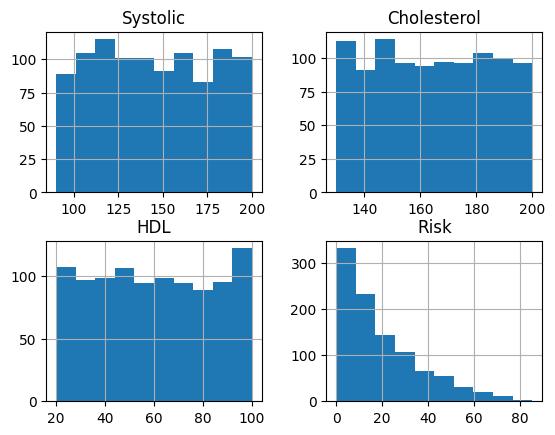

In [10]:
# візуальне представлення даних 
df[["isMale", "isBlack", "isSmoker", "isDiabetic", "isHypertensive"]].hist(figsize=(10,10),bins=2)
df[["Age"]].hist(bins=10)
df[["Systolic", "Cholesterol", "HDL", "Risk"]].hist(bins=10)
plt.show()

In [11]:
#кореляція між даними
df.corr().round(2)

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
isMale,1.00,0.05,-0.02,-0.02,0.01,-0.02,-0.02,0.01,-0.02,0.11
isBlack,0.05,1.00,-0.05,-0.06,0.01,0.03,-0.04,-0.00,0.04,0.06
isSmoker,-0.02,-0.05,1.00,0.03,-0.00,-0.03,0.05,-0.02,-0.01,0.26
isDiabetic,-0.02,-0.06,0.03,1.00,0.03,0.05,-0.01,-0.01,-0.02,0.35
isHypertensive,0.01,0.01,-0.00,0.03,1.00,0.02,0.03,-0.03,-0.03,0.18
Age,-0.02,0.03,-0.03,0.05,0.02,1.00,0.02,0.01,0.04,0.64
Systolic,-0.02,-0.04,0.05,-0.01,0.03,0.02,1.00,-0.06,0.03,0.41
Cholesterol,0.01,-0.00,-0.02,-0.01,-0.03,0.01,-0.06,1.00,0.00,0.05
HDL,-0.02,0.04,-0.01,-0.02,-0.03,0.04,0.03,0.00,1.00,-0.12
Risk,0.11,0.06,0.26,0.35,0.18,0.64,0.41,0.05,-0.12,1.00


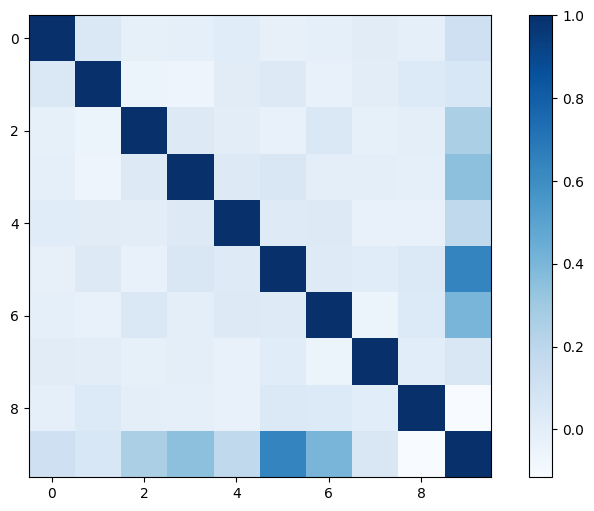

In [12]:
# відображення на кольоровій діаграмі
#from matplotlib import colormaps
#list(colormaps)
plt.figure(figsize = (10,6))
plt.imshow(df.corr(), cmap='Blues', interpolation='nearest') 
plt.colorbar()
plt.show()
# слабка і середня кореляція Risk з Features, з Age - 0.64, Systolic - 0.41,
# потім isDiabetic (0.35) , isSmoker (0.26)

In [13]:
#scaling features -- min-max normalization -- all column besides last ("Risk")
for i in range(df.shape[1] - 1):
    x_max = max(df.iloc[:, i])
    x_min = min(df.iloc[:, i])
    df.iloc[:, i] = (df.iloc[:, i] - x_min) / (x_max - x_min)
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500,11.1
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875,30.1
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875,37.6
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250,13.2
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375,15.1


In [14]:
# визначаємо y_df, -- labels
y_df = df.iloc[:, -1:] / 100    # Risk is in [%]
y_df.head()

,Risk
0,0.111
1,0.301
2,0.376
3,0.132
4,0.151


In [15]:
# робимо зріз df for features
x_df = df.iloc[:, 0:-1]
x_df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375


In [16]:
#ділимо dataset на  train (70%) i test (30%)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=10)

In [17]:
x_train.shape

(700, 9)

In [18]:
y_train.shape

(700, 1)

(array([92., 73., 40., 37., 22., 17.,  8.,  5.,  3.,  3.]),
 array([0.002 , 0.0752, 0.1484, 0.2216, 0.2948, 0.368 , 0.4412, 0.5144,
        0.5876, 0.6608, 0.734 ]),
 <BarContainer object of 10 artists>)

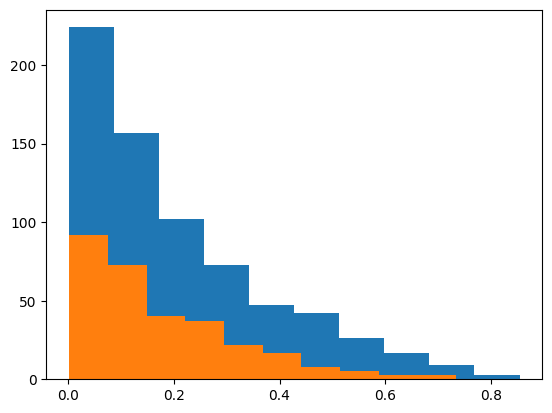

In [19]:
#візуалізація розподілів y_train i y_test
plt.hist(y_train)
plt.hist(y_test)

In [20]:
#перш ніж визначати best_params розберемося з тим, як працює алгоритм DecisionTree
#і візуалізуємо деяке просте дерево за допомогою plot_tree
some_model = DTRegressor(criterion='squared_error', splitter='best', max_depth=3, min_samples_split=2,
                         min_samples_leaf=10, max_features=None, random_state = 9)
model_tree = some_model.fit(x_train, y_train)
#determine the features importance
some_model_df = pd.DataFrame({'feature': model_tree.feature_names_in_, 'weight': model_tree.feature_importances_})
some_model_df

,feature,weight
0,isMale,0.000000
1,isBlack,0.000000
2,isSmoker,0.000000
3,isDiabetic,0.150819
4,isHypertensive,0.000000
5,Age,0.572783
6,Systolic,0.246918
7,Cholesterol,0.000000
8,HDL,0.029479


In [21]:
#print(model_tree.decision_path(x_train))

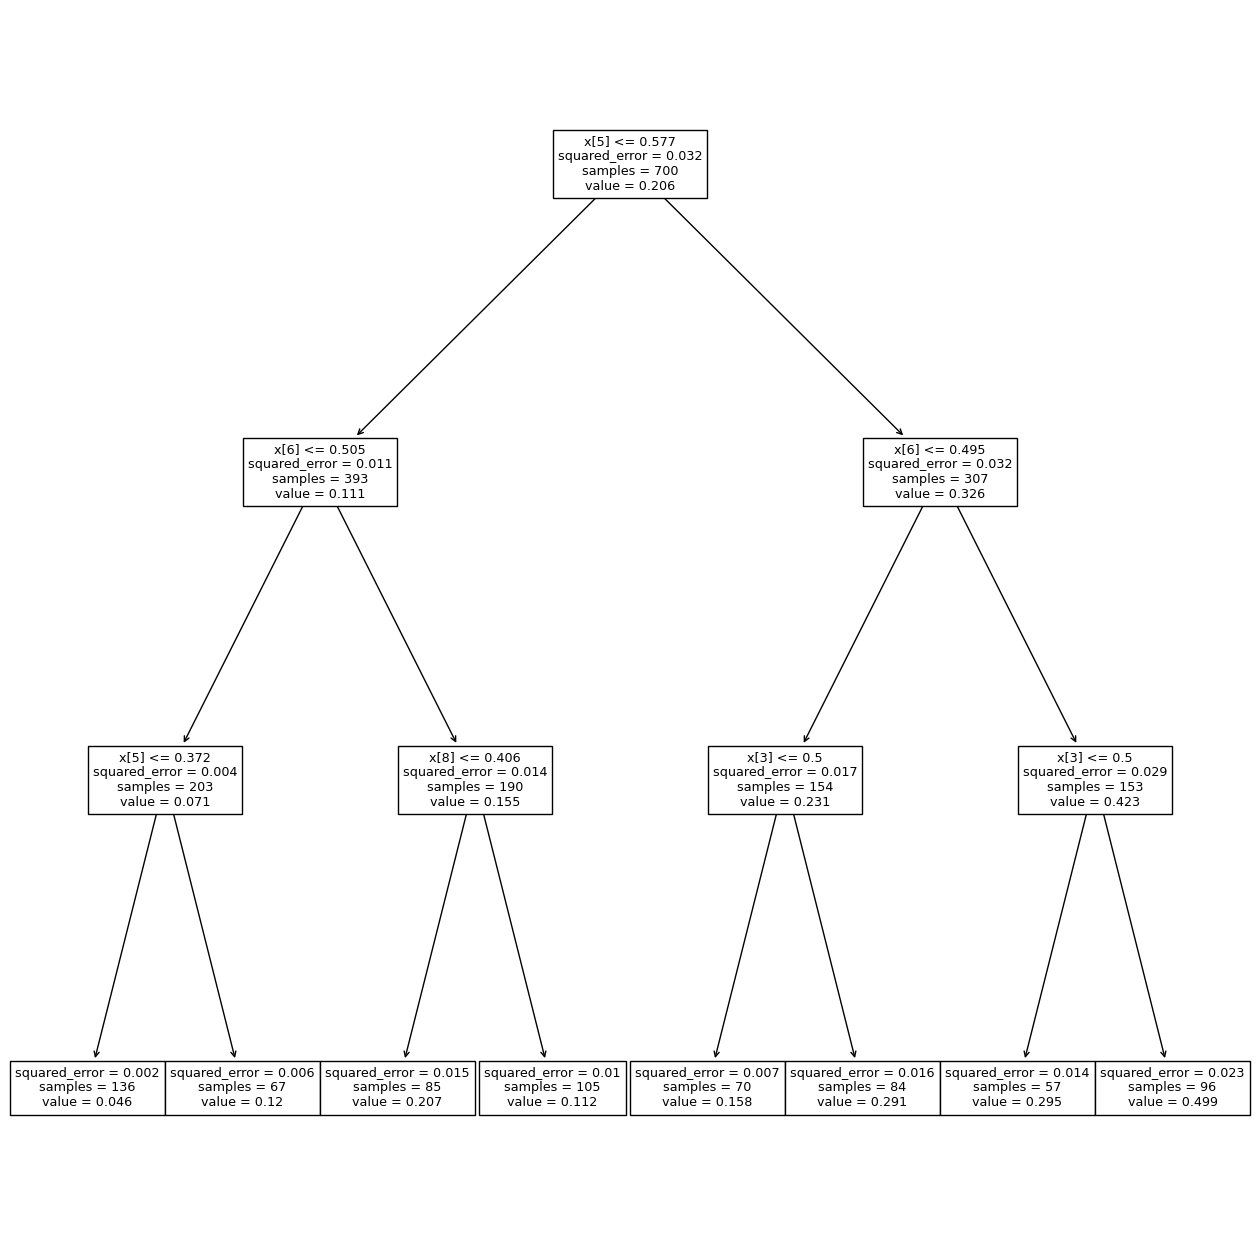

In [22]:
#from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(16,16))
plot_tree(model_tree)
plt.show()

In [23]:
#тепер визначаємо оптимальні параметри моделі для наших даних, і робимо передбачення

In [24]:
#2 - Decision Tree Model
#Hyperparameters that you do NOT tune and simply use default values
criterion = 'squared_error' # this is actually MSE
splitter = 'best'
random_state = 9

In [25]:
hparams_grid = {'max_depth': [3, 4, 5, 6, 7],
                'min_samples_split': [2, 4],
                'min_samples_leaf': [30, 35, 40, 45, 75],
                'max_features': [1, 2, 5, x_train.shape[1]],
                }              

In [26]:
model = DTRegressor(criterion='squared_error', splitter='best', random_state = 9)

In [27]:
# Init Grid Search Cross-Validation
# Use cv = 5, scoring = 'neg_mean_squared_error' (MSE), verbose = 3 and return_train_score = True
gs_ds = GridSearchCV(model, hparams_grid, cv = 5, 
                     scoring = 'neg_mean_squared_error', verbose = 3, 
                     error_score='raise', return_train_score = True)

In [31]:
# Run Grid Search Cross-Validation, it is the most time consuming part
gs_ds.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2;, score=(train=-0.025, test=-0.031) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2;, score=(train=-0.022, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2;, score=(train=-0.026, test=-0.026) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2;, score=(train=-0.021, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2;, score=(train=-0.025, test=-0.030) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4;, score=(train=-0.025, test=-0.031) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4;, score=(train=-0.022, te

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(random_state=9),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [1, 2, 5, 9],
                         'min_samples_leaf': [30, 35, 40, 45, 75],
                         'min_samples_split': [2, 4]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [32]:
# Extract total results of Grid Search Cross-Validation
gs_results = gs_ds.cv_results_
gs_results

{'mean_fit_time': array([0.00366378, 0.00318646, 0.00300107, 0.00306234, 0.00303044,
        0.00314784, 0.00265145, 0.00359936, 0.00241909, 0.00245609,
        0.0028193 , 0.00286307, 0.00292292, 0.00302005, 0.0028192 ,
        0.00262156, 0.00324378, 0.00370111, 0.00319772, 0.00287752,
        0.00309258, 0.00304332, 0.0030828 , 0.00331354, 0.00322213,
        0.00292206, 0.00342321, 0.00322218, 0.00320749, 0.00284791,
        0.00369673, 0.00328369, 0.00339551, 0.00307188, 0.00353518,
        0.00361919, 0.00341825, 0.00342069, 0.00303731, 0.00353293,
        0.00241747, 0.00263844, 0.0030201 , 0.00299978, 0.00303717,
        0.00302305, 0.00239964, 0.00264082, 0.0022191 , 0.0028574 ,
        0.00291557, 0.00332465, 0.00273156, 0.00290222, 0.0031888 ,
        0.00302529, 0.00307488, 0.00326357, 0.00253348, 0.00290294,
        0.0030654 , 0.0033299 , 0.00310469, 0.00372705, 0.0030642 ,
        0.00323539, 0.00288777, 0.00322828, 0.00326791, 0.00293717,
        0.00362678, 0.00382705,

In [33]:
# Extract the best parameters for our model
print(f'The best estimator - {gs_ds.best_estimator_}')
print(f'The best parameters - {gs_ds.best_params_}')

The best estimator - DecisionTreeRegressor(max_depth=6, max_features=9, min_samples_leaf=30,
                      random_state=9)
The best parameters - {'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 30, 'min_samples_split': 2}


In [34]:
#reshape our gs_results to build plots
gs_mean_train_score = gs_results['mean_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_split']), 
                                                      len(hparams_grid['min_samples_leaf']), len(hparams_grid['max_features']))
print(f'gs_mean_train_score = {gs_mean_train_score }') 
gs_std_train_score = gs_results['std_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_split']), 
                                                      len(hparams_grid['min_samples_leaf']), len(hparams_grid['max_features']))
print(f'gs_std_train_score = {gs_std_train_score }') 

gs_mean_test_score = gs_results['mean_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_split']), 
                                                      len(hparams_grid['min_samples_leaf']), len(hparams_grid['max_features']))
print(f'gs_mean_test_score = {gs_mean_test_score }') 
gs_std_test_score = gs_results['std_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_split']), 
                                                      len(hparams_grid['min_samples_leaf']), len(hparams_grid['max_features']))
print(f'gs_std_test_score = {gs_std_test_score }') 

gs_mean_train_score = [[[[-0.02375633 -0.02375633 -0.02304184 -0.02304184]
   [-0.02304184 -0.02304184 -0.0223225  -0.0223225 ]
   [-0.0260601  -0.0260601  -0.02019923 -0.02019923]
   [-0.01930467 -0.01930467 -0.01862819 -0.01862819]
   [-0.01864896 -0.01864896 -0.01996115 -0.01996115]]

  [[-0.01381491 -0.01381491 -0.01381491 -0.01381491]
   [-0.01393349 -0.01393349 -0.01403629 -0.01403629]
   [-0.01669379 -0.01669379 -0.01093209 -0.01093209]
   [-0.01110397 -0.01110397 -0.01111413 -0.01111413]
   [-0.01204608 -0.01204608 -0.01402193 -0.01402193]]]


 [[[-0.02249439 -0.02249439 -0.01855875 -0.01855875]
   [-0.01818483 -0.01818483 -0.02219778 -0.02219778]
   [-0.0260601  -0.0260601  -0.01718996 -0.01718996]
   [-0.01841591 -0.01841591 -0.02028287 -0.02028287]
   [-0.0207156  -0.0207156  -0.01996115 -0.01996115]]

  [[-0.01027183 -0.01027183 -0.01081752 -0.01081752]
   [-0.01199225 -0.01199225 -0.01349401 -0.01349401]
   [-0.01669379 -0.01669379 -0.00935659 -0.00935659]
   [-0.00989687 

In [35]:
#hparams_grid = {'max_depth': [3, 4, 5, 6, 7],
#                'min_samples_split': [2, 4],
#                'min_samples_leaf': [30, 35, 40, 45, 75],
#                'max_features': [1, 2, 5, None],
#                }              
#The best parameters - {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 2}
# for different 'max_features'

[2, 4] 30


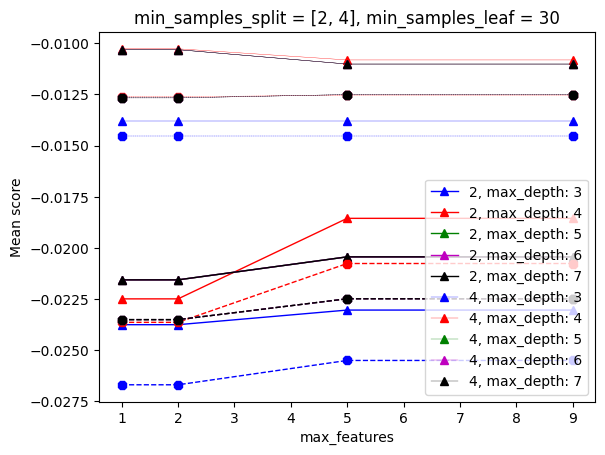

In [36]:
# Visuzalize results of Grid Search Cross-Validation
color_line = ['b', 'r', 'g', 'm', 'k', 'y', 'c'] 

value_min_samples_split = hparams_grid['min_samples_split']
value_min_samples_leaf = hparams_grid['min_samples_leaf'][0]
print(value_min_samples_split, value_min_samples_leaf)


#for 'min_samples_split' = 2 ( hparams_grid['min_samples_split'][0], 'min_samples_leaf'= 30 [0])
for i in range(len(hparams_grid['max_depth'])):
    max_depth_ = str(hparams_grid['max_depth'][i])
    plt.plot(hparams_grid['max_features'], gs_mean_train_score[i][0][0], '^-' + color_line[i], linewidth=1, label='2, max_depth: ' + max_depth_ )   
for i in range(len(hparams_grid['max_depth'])):
    plt.plot(hparams_grid['max_features'], gs_mean_test_score[i][0][0], '8--' + color_line[i], linewidth=1 )  

#for 'min_samples_split' = 4 ( hparams_grid['min_samples_split'][1],  'min_samples_leaf'= 30 [0])
for i in range(len(hparams_grid['max_depth'])):
   max_depth_ = str(hparams_grid['max_depth'][i])
   plt.plot(hparams_grid['max_features'], gs_mean_train_score[i][1][0], '^-' + color_line[i], linewidth=0.25, label='4, max_depth: ' + max_depth_ )
for i in range(len(hparams_grid['max_depth'])):
   plt.plot(hparams_grid['max_features'], gs_mean_test_score[i][1][0], '8--' + color_line[i], linewidth=0.25 )    
    
plt.xlabel('max_features')
plt.ylabel('Mean score')
plt.title(f'min_samples_split = {value_min_samples_split}, min_samples_leaf = {value_min_samples_leaf}')
plt.legend()

[2, 4] 9


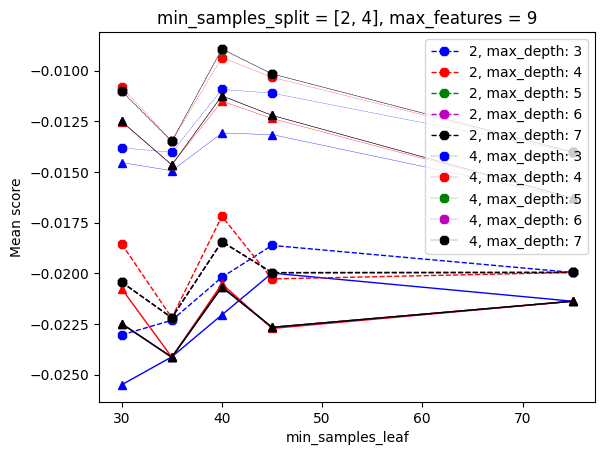

In [37]:
#for 'min_samples_split' = 2 ( hparams_grid['min_samples_split'][0], 'min_samples_leaf'= 30 [0])
# value_min_samples_split = hparams_grid['min_samples_split']
a_mean_train_0 = []
a_mean_test_0 = []
a_std_train_0 = []
a_std_test_0 = []
a_mean_train_1 = []
a_mean_test_1 = []
a_std_train_1 = []
a_std_test_1 = []
#for 'min_samples_split' = 4 ( hparams_grid['min_samples_split'][0]) 
for i in range(len(hparams_grid['max_depth'])):
    a_mean_train_0.append(gs_mean_train_score[i][0].transpose())
    a_mean_test_0.append(gs_mean_test_score[i][0].transpose())
    a_std_train_0.append(gs_std_train_score[i][0].transpose())
    a_std_test_0.append(gs_std_test_score[i][0].transpose())
    
#for 'min_samples_split' = 4 ( hparams_grid['min_samples_split'][1])  
for i in range(len(hparams_grid['max_depth'])):
    a_mean_train_1.append(gs_mean_train_score[i][1].transpose())
    a_mean_test_1.append(gs_mean_test_score[i][1].transpose())
    a_std_train_1.append(gs_std_train_score[i][1].transpose())
    a_std_test_1.append(gs_std_test_score[i][1].transpose())
max_features = len(hparams_grid['max_features']) - 1
value_max_features = hparams_grid['max_features'][max_features]
print(value_min_samples_split, value_max_features)

#for 'min_samples_split' = 4 ( hparams_grid['min_samples_split'][0])  
for i in range(len(hparams_grid['max_depth'])):
    max_depth_ = str(hparams_grid['max_depth'][i])
    plt.plot(hparams_grid['min_samples_leaf'], a_mean_train_0[i][max_features], '8--' + color_line[i], linewidth=1, label='2, max_depth: ' + max_depth_)
    plt.plot(hparams_grid['min_samples_leaf'], a_mean_test_0[i][max_features],  '^-' + color_line[i], linewidth=1  )  

#for 'min_samples_split' = 4 ( hparams_grid['min_samples_split'][1])  
for i in range(len(hparams_grid['max_depth'])):
    max_depth_ = str(hparams_grid['max_depth'][i])
    plt.plot(hparams_grid['min_samples_leaf'], a_mean_train_1[i][max_features], '8--' + color_line[i], linewidth=0.25, label='4, max_depth: ' + max_depth_)
    plt.plot(hparams_grid['min_samples_leaf'], a_mean_test_1[i][max_features],  '^-' + color_line[i], linewidth=0.25  )  



plt.xlabel('min_samples_leaf')
plt.ylabel('Mean score')
plt.title(f'min_samples_split = {value_min_samples_split}, max_features = {value_max_features}')
plt.legend()

In [38]:
my_best_model = gs_ds.best_estimator_
print(my_best_model)

DecisionTreeRegressor(max_depth=6, max_features=9, min_samples_leaf=30,
                      random_state=9)


In [39]:
# Extract hyperparameters of already trained the best model
my_best_hparams = gs_ds.best_params_
print(my_best_hparams)

{'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 30, 'min_samples_split': 2}


In [40]:
# Compute prediction scores
y_train_pred = my_best_model.predict(x_train)
y_test_pred = my_best_model.predict(x_test)

In [41]:
#print(y_train_pred)
print(f'train = {y_train_pred.shape}, test = {y_test_pred.shape}')

train = (700,), test = (300,)


In [42]:
print(y_test_pred)

[0.07423214 0.23190196 0.06523729 0.29512281 0.23190196 0.24696154
 0.15616327 0.29512281 0.145      0.128075   0.19753333 0.07423214
 0.15616327 0.29512281 0.06523729 0.15616327 0.07191429 0.0164
 0.29512281 0.07191429 0.172875   0.29512281 0.24696154 0.145
 0.172875   0.19753333 0.128075   0.06523729 0.07191429 0.172875
 0.29512281 0.07423214 0.23190196 0.24696154 0.29512281 0.15616327
 0.145      0.29512281 0.07423214 0.23190196 0.04794595 0.145
 0.07191429 0.23190196 0.56768519 0.04794595 0.41078571 0.24696154
 0.04794595 0.23190196 0.15616327 0.15616327 0.41078571 0.23190196
 0.19753333 0.07423214 0.07191429 0.24696154 0.15616327 0.07423214
 0.172875   0.06523729 0.56768519 0.128075   0.128075   0.29512281
 0.56768519 0.07191429 0.24696154 0.24696154 0.145      0.19753333
 0.29512281 0.56768519 0.29512281 0.04794595 0.145      0.23190196
 0.172875   0.0164     0.06523729 0.145      0.06523729 0.04794595
 0.07191429 0.0164     0.0164     0.0164     0.07423214 0.07423214
 0.128075  

(array([66., 47., 82., 29., 16., 26., 12., 11.,  0., 11.]),
 array([0.0164    , 0.07152852, 0.12665704, 0.18178556, 0.23691407,
        0.29204259, 0.34717111, 0.40229963, 0.45742815, 0.51255667,
        0.56768519]),
 <BarContainer object of 10 artists>)

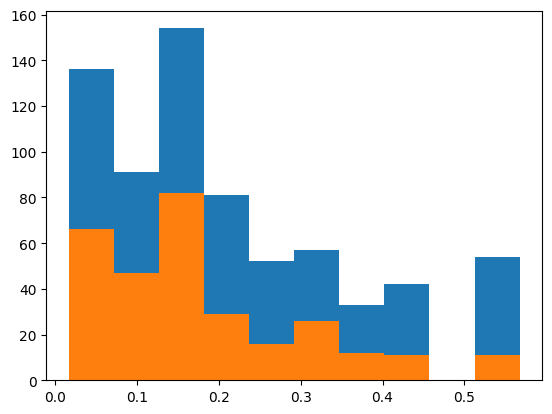

In [43]:
plt.hist(y_train_pred)
plt.hist(y_test_pred)

In [44]:
# Extimate train & test errors with RMSE
# RMSE is just square root of MSE, RMSE has the same units as y
r2_test = sm.r2_score(y_test,y_test_pred)       #sm.explained_variance_score == sm.r2_score
mse_test = sm.mean_squared_error(y_test,y_test_pred) 
rmse_test = math.sqrt(mse_test)   

r2_train = sm.r2_score(y_train,y_train_pred)
mse_train = sm.mean_squared_error(y_train,y_train_pred)
rmse_train =  math.sqrt(mse_train)

print(f'r2_train = {r2_train}')
print(f'mse_train = {mse_train}')
print(f'rmse_train = {rmse_train}\n')

print(f'r2_test = {r2_test}')
print(f'mse_test = {mse_test}')
print(f'rmse_test = {rmse_test}')

r2_train = 0.7266630519671985
mse_train = 0.00864342980804985
rmse_train = 0.09297004790818304

r2_test = 0.6436468654901968
mse_test = 0.00795242452277163
rmse_test = 0.08917636751276445


In [45]:
# Functions in sklearn.metrics for regression: mean_squared_error, mean_absolute_error, 
#                       r2_score, explained_variance_score, 
#                       mean_pinball_loss, d2_pinball_score, d2_absolute_error_score.

In [46]:
#plots with error bar    
#for i in range(len(hparams_grid['max_depth'])):
#    max_depth_ = str(hparams_grid['max_depth'][i])
#    plt.errorbar(hparams_grid['max_features'], 
#                 gs_mean_train_score[i][0][0], gs_std_train_score[i][0][0], 
#                 fmt='^-' + color_line[i], linewidth=1, capsize=6, label='train'+'max_depth: ' + max_depth_ )   

In [47]:
#3 - Random Forest Model
hparams_grid = {'n_estimators': [10, 50, 100],
                'max_depth': [3, 4, 5, 6, 7],
                'min_samples_split': [2, 4],
                'min_samples_leaf': [30, 35, 40, 45, 75],
                'max_features': [1, 2, 5, x_train.shape[1]]}

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion='squared_error', random_state = 9)

In [49]:
gs_ds = GridSearchCV(model, hparams_grid, cv = 5, 
                     scoring = 'neg_mean_squared_error', verbose = 3, 
                     error_score='raise', return_train_score = True)

In [ ]:
gs_fit = gs_ds.fit(x_train, y_train)
gs_results = fit.cv_results_
gs_results

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.024) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.024) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.025) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.1s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.1s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.1s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.009) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.009) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.1s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.1s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=45, min

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.017, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.017, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.027) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=30, min

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=6, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.017, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.017, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.019, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.016) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.024) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.017) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.024) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.019) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.022) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.022, test=-0.021) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.020, test=-0.023) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.021, test=-0.021) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.024, test=-0.024) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.028) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.021) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.025, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.025) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.024, test=-0.023) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=1, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.023, test=-0.023) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.013) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.017) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.016) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.018, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.019) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.020, test=-0.026) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.022, test=-0.018) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.020) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.021, test=-0.024) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.021) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.019, test=-0.019) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.022) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.019, test=-0.015) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=2, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.018, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.008) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.009) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.013, test=-0.011) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_sam

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.013) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.018) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_s

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.017) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.018) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.012) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.015) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.014, test=-0.017) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=5, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.008) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.008, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=30, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.010) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.011) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.009) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.009, test=-0.012) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=35, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.012) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.010, test=-0.013) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=40, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=2, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.011) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=10;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=50;, score=(train=-0.012, test=-0.013) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.010) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.012) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.011, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=45, min_samples_split=4, n_estimators=100;, score=(train=-0.012, test=-0.012) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_sa

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=2, n_estimators=100;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.017, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.017) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_

D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=10;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.014) total time=   0.0s
[CV 3/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.016) total time=   0.0s
[CV 4/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.020) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vec

[CV 5/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=50;, score=(train=-0.016, test=-0.015) total time=   0.0s
[CV 1/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 2/5] END max_depth=7, max_features=9, min_samples_leaf=75, min_samples_split=4, n_estimators=100;, score=(train=-0.015, test=-0.014) total time=   0.0s


D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\MachineLearningProjects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
